# 0.0 Imports

In [1]:
import warnings

import pandas as pd
import numpy as np

from sklearn import metrics as mt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

In [2]:
warnings.filterwarnings('ignore')

# 1.0 Load Dataset

In [3]:
#Data Path
data_path_X_trian = '../regressao/X_training.csv'
data_path_y_trian = '../regressao/y_training.csv'

data_path_X_val = '../regressao/X_validation.csv'
data_path_y_val = '../regressao/y_val.csv'

data_path_X_test = '../regressao/X_test.csv'
data_path_y_test = '../regressao/y_test.csv'

# Train Dataset
X_train = pd.read_csv(data_path_X_trian)
y_train = pd.read_csv(data_path_y_trian)

# Validation Dataset
X_val = pd.read_csv(data_path_X_val)
y_val = pd.read_csv(data_path_y_val)

# Test Dataset
X_test = pd.read_csv(data_path_X_test)
y_test = pd.read_csv(data_path_y_test)

In [4]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 Performance

## 2.1 Train Performance

In [5]:
# Define Polynomial Model
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform(X_train)

# Define Lasso Model
poly_lasso = Lasso(random_state=42)

# Fit Model
poly_lasso.fit(X_poly_train, y_train)

# Predict
y_pred_train = poly_lasso.predict(X_poly_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, y_pred_train)
mse_train = mt.mean_squared_error(y_train, y_pred_train)
rmse_train = mt.mean_squared_error(y_train, y_pred_train, squared= False)
mae_train = mt.mean_absolute_error(y_train, y_pred_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_pred_train)

print(f"Train R2: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}")

Train R2: 0.009149935251170582
Train MSE: 473.6387760067563
Train RMSE: 21.763243692215468
Train MAE: 17.285449661261286
Train MAPE: 8.699700898061744


## 2.2 Validation Performance

In [6]:
# Define Polynomial Model
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.fit_transform(X_val)

# Define Lasso Model
poly_lasso = Lasso(random_state=42)

# Fit Model
poly_lasso.fit(X_poly_train, y_train)

# Predict
y_pred_val = poly_lasso.predict(X_poly_val)

# Performance Metrics

# Performance Metrics
r2_val = mt.r2_score(y_val, y_pred_val)
mse_val = mt.mean_squared_error(y_val, y_pred_val)
rmse_val = mt.mean_squared_error(y_val, y_pred_val, squared= False)
mae_val = mt.mean_absolute_error(y_val, y_pred_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_pred_val)

print(f"Validation R2: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}")

Validation R2: 0.009631007774810185
Validation MSE: 472.91269390919564
Validation RMSE: 21.746555909136408
Validation MAE: 17.238378728440562
Validation MAPE: 8.681846557814456


## 2.3 Fine Tunning

### Parameteres:
- `degree`
- `alpha`
- `max_iter`

### Degree

In [7]:
degree = np.arange(1,6)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [8]:
for i in degree:
    # Define Polynomial Model
    poly = PolynomialFeatures( degree=i )
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Define Lasso Model
    poly_lasso = Lasso(random_state=42)

    # Fit Model
    poly_lasso.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_lasso.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared= False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

    print(f"Degree: {i}, RMSE: {rmse}")

Degree: 1, RMSE: 21.76573180289256
Degree: 2, RMSE: 21.746555909136408
Degree: 3, RMSE: 21.69690689620617
Degree: 4, RMSE: 21.95983497923633
Degree: 5, RMSE: 34.35264485964911


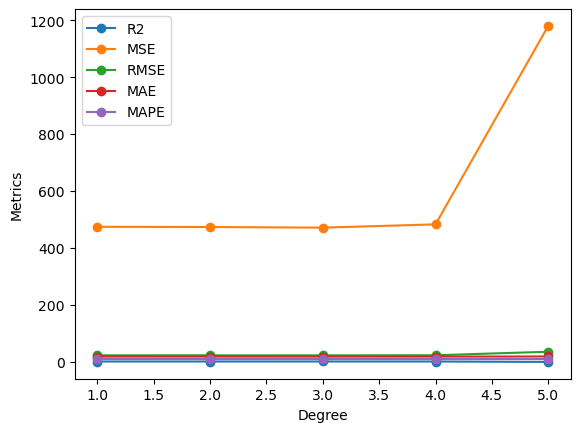

In [9]:
plt.plot(degree,r2_list, marker='o', label='R2')
plt.plot(degree,mse_list, marker='o', label='MSE')
plt.plot(degree,rmse_list, marker='o', label='RMSE')
plt.plot(degree,mae_list, marker='o', label='MAE')
plt.plot(degree,mape_list, marker='o', label='MAPE')
plt.xlabel('Degree')
plt.ylabel('Metrics')
plt.legend()

In [10]:
metricas = [r2_list, mse_list, rmse_list, mae_list, mape_list]

indice_menor_metrica = np.argmin(metricas)

menor_metrica = metricas [indice_menor_metrica]

print(f"A métrica com o menor valor é {menor_metrica}, no índice {indice_menor_metrica}")

A métrica com o menor valor é [8.695808367641687, 8.681846557814456, 8.655827568999914, 8.681068784145179, 8.679900131202112], no índice 4


In [13]:
best_degree = degree[np.argmin(mape_list)]
best_degree

3

### Alpha

In [14]:
alpha = np.arange(0, 5, 0.2)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [15]:
for i in alpha:
    # Define Polynomial Model
    poly = PolynomialFeatures(degree=best_degree )
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Define Lasso Model
    poly_lasso = Lasso(random_state=42, alpha=i)

    # Fit Model
    poly_lasso.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_lasso.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared= False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

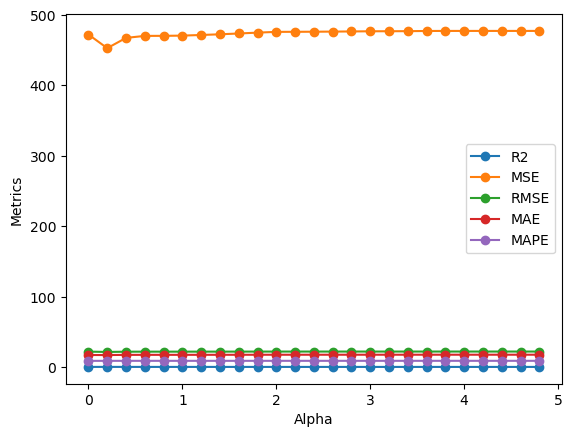

In [16]:
plt.plot(alpha, r2_list, marker="o", label="R2")
plt.plot(alpha, mse_list, marker="o", label="MSE")
plt.plot(alpha, rmse_list, marker="o", label="RMSE")
plt.plot(alpha, mae_list, marker="o", label="MAE")
plt.plot(alpha, mape_list, marker="o", label="MAPE")
plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.legend()

In [18]:
best_alpha = alpha[np.argmin(mse_list)]
best_alpha

0.2

### Max Iter

In [21]:
max_iter = np.arange(400, 2100, 100)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [22]:
for i in max_iter:
    # Define Polynomial Model
    poly = PolynomialFeatures(degree=best_degree )
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Define Lasso Model
    poly_lasso = Lasso(random_state=42, alpha= best_alpha, max_iter=i)

    # Fit Model
    poly_lasso.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_lasso.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared= False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

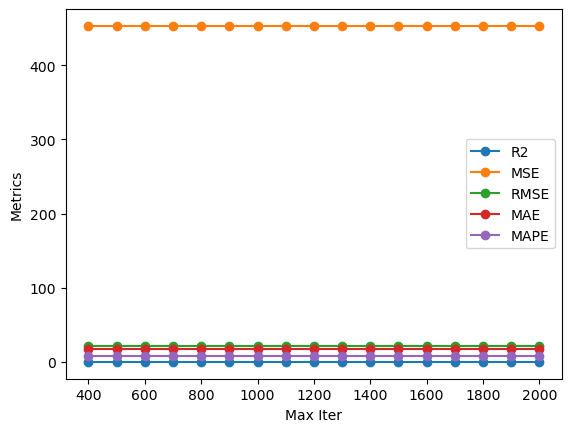

In [23]:
plt.plot(max_iter, r2_list, marker="o", label="R2")
plt.plot(max_iter, mse_list, marker="o", label="MSE")
plt.plot(max_iter, rmse_list, marker="o", label="RMSE")
plt.plot(max_iter, mae_list, marker="o", label="MAE")
plt.plot(max_iter, mape_list, marker="o", label="MAPE")
plt.xlabel("Max Iter")
plt.ylabel("Metrics")
plt.legend()

In [24]:
best_max_iter = max_iter[np.argmin(mse_list)]
best_max_iter

400

## 2.4 Test Performance

In [26]:
# Define Polynomial Model
poly = PolynomialFeatures(degree=best_degree )
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)


# Define Lasso Model
poly_lasso = Lasso(random_state=42, alpha= best_alpha, max_iter=best_max_iter)

# Fit Model
poly_lasso.fit(np.concatenate((X_poly_train, X_poly_val)),np.concatenate((y_train, y_val)))

# Predict
y_pred_test = poly_lasso.predict(X_poly_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, y_pred_test)
mse_test = mt.mean_squared_error(y_test, y_pred_test)
rmse_test = mt.mean_squared_error(y_test, y_pred_test, squared= False)
mae_test = mt.mean_absolute_error(y_test, y_pred_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test R2: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")

Test R2: 0.05624743375661545
Test MSE: 459.5140454998602
Test RMSE: 21.436278723226664
Test MAE: 17.016752837926244
Test MAPE: 8.575676598682453


# 3.0 Results

In [27]:
train_metrics = {
    "Algorithm": "Polynomial Regression - Lasso",
    "R2": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "Polynomial Regression - Lasso",
    "R2": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "Polynomial Regression - Lasso",
    "R2": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./reg_train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./reg_validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./reg_test_metrics.csv", mode="a", header=False
)